# Multi-dimensional interpolation example for O$_2$sclpy

See the O$_2$sclpy documentation at https://neutronstars.utk.edu/code/o2sclpy for more information.

In [1]:
import o2sclpy
import matplotlib.pyplot as plot
import ctypes
import numpy
import sys

plots=True
if 'pytest' in sys.modules:
    plots=False

Link the O$_2$scl library:

In [2]:
link=o2sclpy.linker()
link.link_o2scl()

Create the data set:

In [3]:
ug=o2sclpy.uniform_grid_end.init(link,0,2,99)
t3d=o2sclpy.table3d(link)
t3d.set_xy_grid("x",ug,"y",ug)
t3d.new_slice("z")
for i in range(0,t3d.get_nx()):
    for j in range(0,t3d.get_ny()):
        x=t3d.get_grid_x(i)
        y=t3d.get_grid_y(j)
        r=numpy.sqrt(x**2+y**2)+numpy.cos(x*4)-y
        t3d.set(i,j,"z",numpy.sin(r*5))

In [4]:
if plots:
    pl=o2sclpy.plot_base()

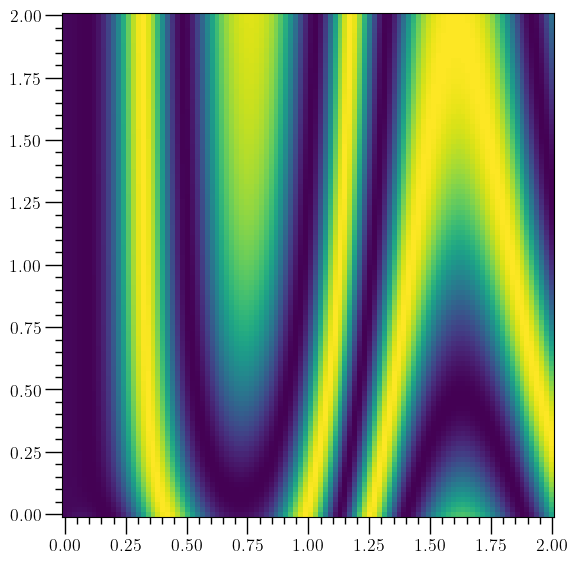

In [5]:
if plots:
    pl.canvas()
    pl.den_plot([t3d,"z"])
    pl.colbar=True
    #pl.xtitle('radius (km)')
    #pl.ytitle('gravitational mass (Msun)')
    plot.show()

Collect function values scattered across this plane:

In [6]:
import random
N=300
x2=numpy.zeros((N,2))
y2=numpy.zeros((N,1))
for i in range(0,N):
    x2[i,0]=random.random()*2.0
    x2[i,1]=random.random()*2.0
    y2[i,0]=t3d.interp(x2[i,0],x2[i,1],"z")

In [7]:
im=o2sclpy.interpm_sklearn_gp()
im.set_data_str(x2,y2,'test_size=0.1')

String: test_size=0.1 Dictionary: {'test_size': 0.1}
score: 0.8946831587581694


In [8]:
t3d.new_slice("gp")
for i in range(0,t3d.get_nx()):
    for j in range(0,t3d.get_ny()):
        x=t3d.get_grid_x(i)
        y=t3d.get_grid_y(j)
        t3d.set(i,j,"gp",im.eval(numpy.array([x,y])))

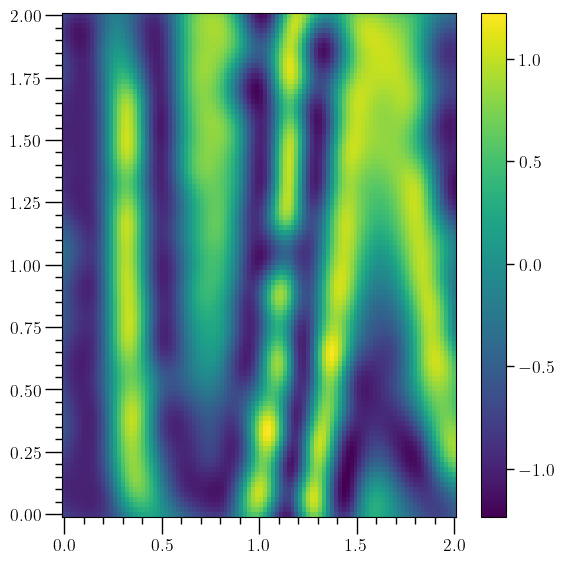

In [9]:
if plots:
    pl.canvas()
    pl.den_plot([t3d,"gp"])
    pl.colbar=True
    plot.show()

In [10]:
%%capture 
im2=o2sclpy.interpm_tf_dnn()
im2.set_data(x2,y2,verbose=1,epochs=200,
            test_size=0.0,batch_size=8,transform='none',
            activations=['relu','relu','relu','relu'],
            hlayers=[128,64,32,16])

2024-03-20 16:22:22.986375: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
t3d.new_slice("nn")
for i in range(0,t3d.get_nx(),5):
    for j in range(0,t3d.get_ny(),5):
        x=t3d.get_grid_x(i)
        y=t3d.get_grid_y(j)
        print(x,y,im2.eval(numpy.array([x,y])))
        t3d.set(i,j,"nn",im2.eval(numpy.array([x,y])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
0.0 0.0 [-1.01751244]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0.0 0.10101010101010102 [-1.00259864]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.0 0.20202020202020204 [-0.98796803]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.0 0.30303030303030304 [-1.00374424]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.0 0.4040404040404041 [-1.01790321]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.0 0.5050505050505051 [-1.02738845]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.0 0.6060606060606061 [-1.03628838]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.0 0.7070707070707072 [-1.04300046]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.0 0.8080808080808082 [-1.04591024]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/

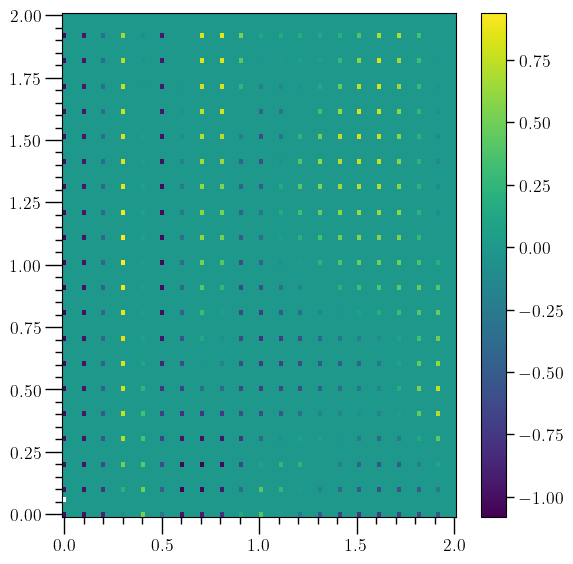

In [12]:
if plots:
    pl.canvas()
    pl.den_plot([t3d,"nn"])
    pl.colbar=True
    plot.show()